In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
data = pd.read_csv("C:/Users/saimi/Downloads/apple.csv")

In [3]:
data.head()

,class,text
0,Pos,Now all @Apple has to do is get swype on the i...
1,Pos,@Apple will be adding more carrier support to ...
2,Pos,Hilarious @youtube video - guy does a duet wit...
3,Pos,@RIM you made it too easy for me to switch to ...
4,Pos,I just realized that the reason I got into twi...


In [4]:
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')

# Use English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Data Cleaning with NLTK stopwords
data['cleaned_text'] = data['text'].str.lower().str.replace(r'[^a-z\s]', '', regex=True)
data['cleaned_text'] = data['cleaned_text'].apply(
    lambda x: ' '.join(word for word in x.split() if word not in stop_words)
)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saimi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
data.head()

,class,text,cleaned_text
0,Pos,Now all @Apple has to do is get swype on the i...,apple get swype iphone crack iphone
1,Pos,@Apple will be adding more carrier support to ...,apple adding carrier support iphone announced
2,Pos,Hilarious @youtube video - guy does a duet wit...,hilarious youtube video guy duet apple siri pr...
3,Pos,@RIM you made it too easy for me to switch to ...,rim made easy switch apple iphone see ya
4,Pos,I just realized that the reason I got into twi...,realized reason got twitter ios thanks apple


In [6]:
sentiment_counts = data['class'].value_counts()
sentiment_counts

class
Neutral    509
Neg        316
Pos        163
Name: count, dtype: int64

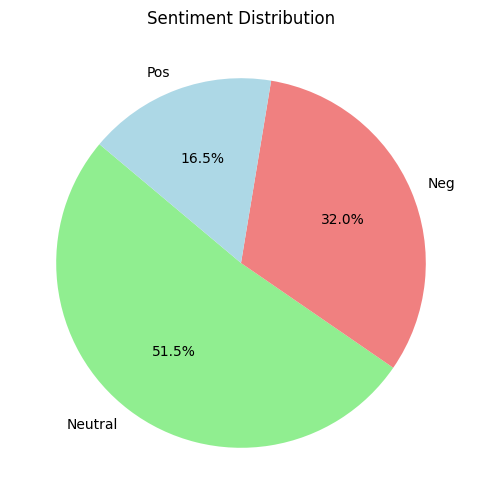

In [7]:
data['class'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, 
                                  colors=['lightgreen', 'lightcoral','lightblue'], figsize=(8, 6))
plt.title("Sentiment Distribution")
plt.ylabel('')
plt.show()

C:\Users\saimi\AppData\Local\Temp\ipykernel_33180\977290130.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(product_counts.keys()), y=list(product_counts.values()), palette='viridis')


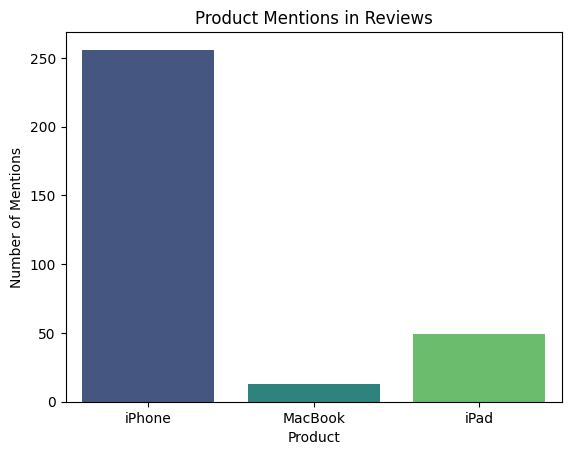

In [8]:
products = ['iPhone', 'MacBook', 'iPad']
product_counts = {product: data['cleaned_text'].str.contains(product, case=False).sum() 
                  for product in products}
sns.barplot(x=list(product_counts.keys()), y=list(product_counts.values()), palette='viridis')
plt.title("Product Mentions in Reviews")
plt.xlabel("Product")
plt.ylabel("Number of Mentions")
plt.show()

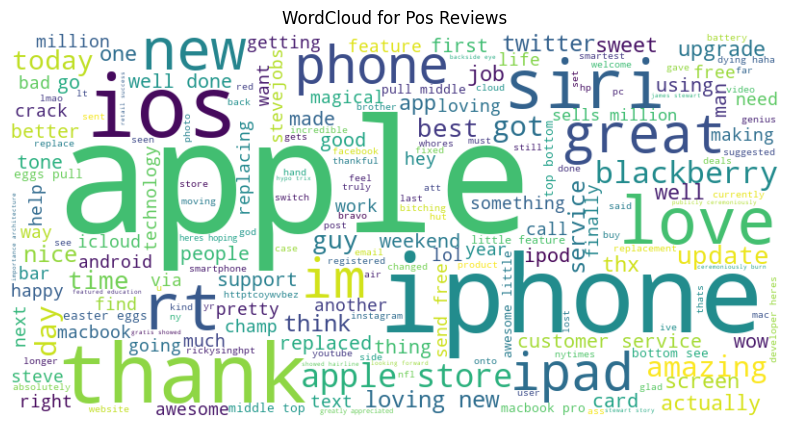

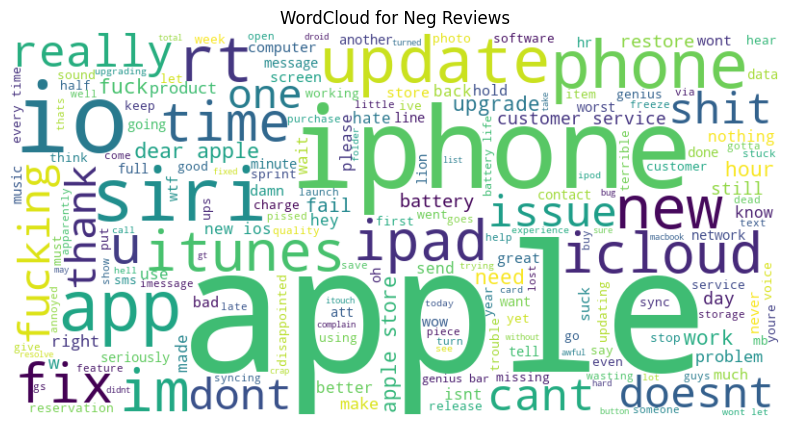

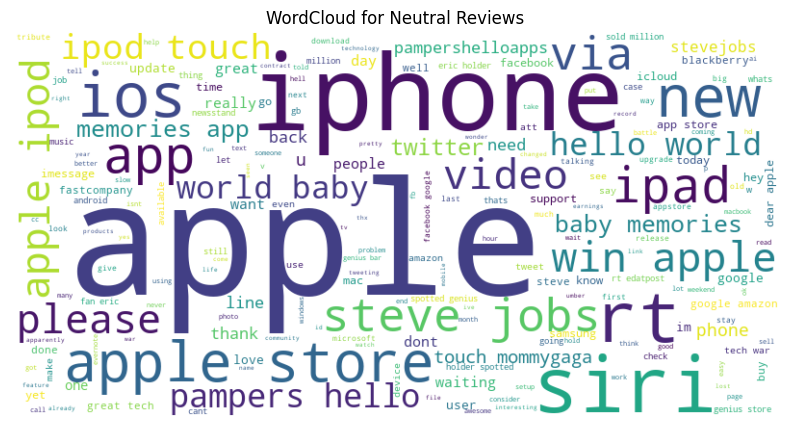

In [9]:
for sentiment in ['Pos', 'Neg','Neutral']:
    text = ' '.join(data[data['class'] == sentiment]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {sentiment} Reviews")
    plt.show()

# Logistic Regression 

Logistic Regression Accuracy: 0.6363636363636364
              precision    recall  f1-score   support

         Neg       0.67      0.33      0.44        61
     Neutral       0.63      0.96      0.76       108
         Pos       1.00      0.07      0.13        29

    accuracy                           0.64       198
   macro avg       0.76      0.45      0.44       198
weighted avg       0.69      0.64      0.57       198



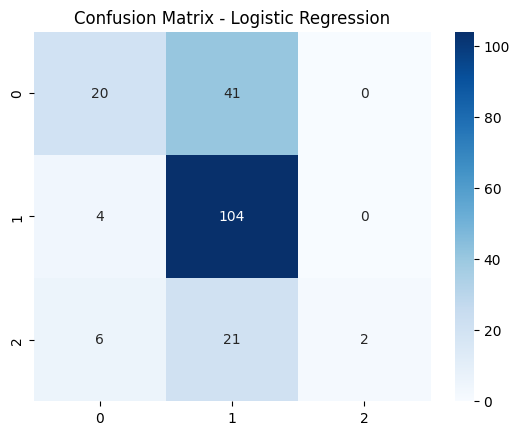

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_text'])
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(solver='liblinear', C=1.0)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
y_pred_proba_lr = log_reg.predict_proba(X_test)[:, 1]

lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", lr_accuracy)
print(classification_report(y_test, y_pred_lr))

conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr, pos_label='Pos')
auc_lr = auc(fpr_lr, tpr_lr)


# Naive Bayes

Naive Bayes Accuracy: 0.6818181818181818
              precision    recall  f1-score   support

         Neg       0.81      0.49      0.61        61
     Neutral       0.65      0.96      0.78       108
         Pos       1.00      0.03      0.07        29

    accuracy                           0.68       198
   macro avg       0.82      0.50      0.49       198
weighted avg       0.75      0.68      0.62       198



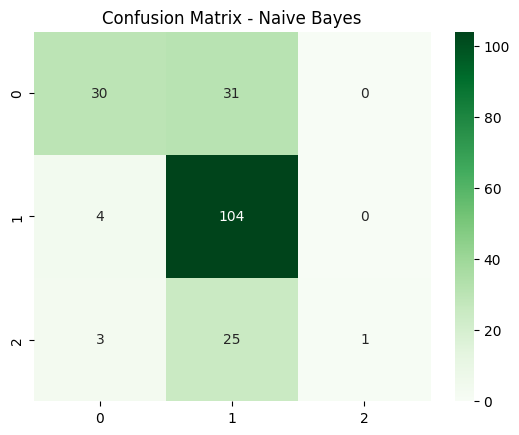

In [11]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB(alpha=1.0)
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
y_pred_proba_nb = nb.predict_proba(X_test)[:, 1]

nb_accuracy = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", nb_accuracy)
print(classification_report(y_test, y_pred_nb))

conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_proba_nb, pos_label='Pos')
auc_nb = auc(fpr_nb, tpr_nb)



# SVM

SVM Accuracy: 0.5909090909090909
              precision    recall  f1-score   support

         Neg       1.00      0.13      0.23        61
     Neutral       0.57      1.00      0.73       108
         Pos       1.00      0.03      0.07        29

    accuracy                           0.59       198
   macro avg       0.86      0.39      0.34       198
weighted avg       0.77      0.59      0.48       198



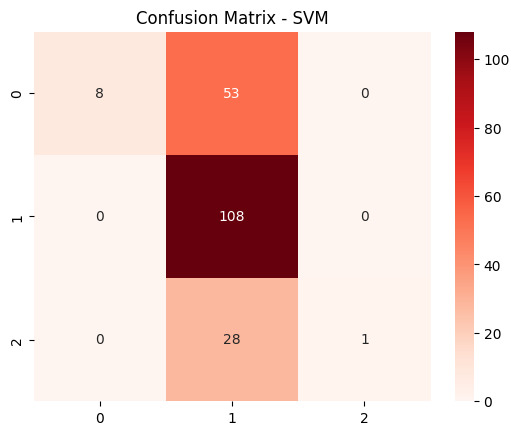

In [12]:
from sklearn.svm import SVC


svm_model = SVC(kernel='rbf', C=2.0, gamma=0.1, probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]

svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)
print(classification_report(y_test, y_pred_svm))

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - SVM')
plt.show()

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm, pos_label='Pos')
auc_svm = auc(fpr_svm, tpr_svm)


# XG Boost

XGBoost Accuracy: 0.6515151515151515
              precision    recall  f1-score   support

         Neg       0.62      0.43      0.50        61
     Neutral       0.65      0.86      0.74       108
         Pos       0.71      0.34      0.47        29

    accuracy                           0.65       198
   macro avg       0.66      0.54      0.57       198
weighted avg       0.65      0.65      0.63       198



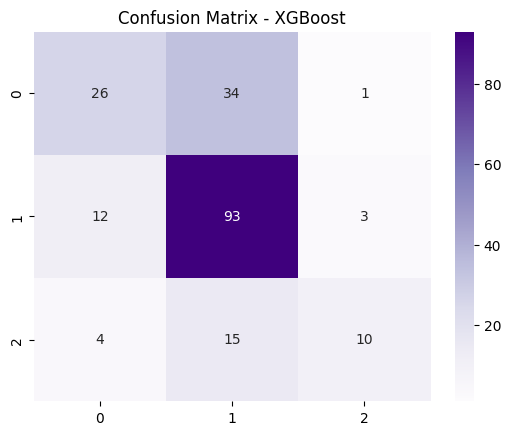

In [13]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb_model = XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=100)
xgb_model.fit(X_train, y_train_encoded)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)

xgb_accuracy = accuracy_score(y_test, y_pred_xgb_decoded)
print("XGBoost Accuracy:", xgb_accuracy)
print(classification_report(y_test, y_pred_xgb_decoded))

conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb_decoded)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - XGBoost')
plt.show()

fpr_xgb, tpr_xgb, _ = roc_curve(y_test_encoded, y_pred_proba_xgb, pos_label=label_encoder.transform(['Pos'])[0])
auc_xgb = auc(fpr_xgb, tpr_xgb)


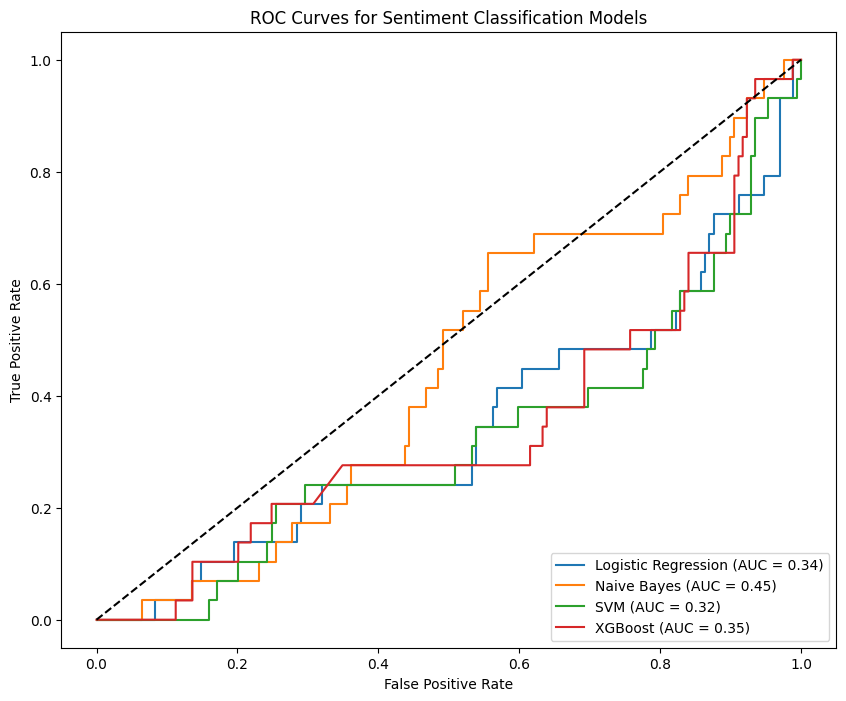

In [14]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression (AUC = %0.2f)" % auc_lr)
plt.plot(fpr_nb, tpr_nb, label="Naive Bayes (AUC = %0.2f)" % auc_nb)
plt.plot(fpr_svm, tpr_svm, label="SVM (AUC = %0.2f)" % auc_svm)
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost (AUC = %0.2f)" % auc_xgb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Sentiment Classification Models')
plt.legend(loc="lower right")
plt.show()

In [16]:
metrics = {
    'Model': ['Logistic Regression', 'Naive Bayes', 'SVM', 'XGBoost'],
    'Accuracy': [lr_accuracy, nb_accuracy, svm_accuracy, xgb_accuracy],
    'Precision': ['LR_Precision', 'NB_Precision', 'SVM_Precision', 'XGB_Precision'],
    'Recall': ['LR_Recall', 'NB_Recall', 'SVM_Recall', 'XGB_Recall'],
    'F1-Score': ['LR_F1', 'NB_F1', 'SVM_F1', 'XGB_F1'],
    'AUC': [auc_lr, auc_nb, auc_svm, auc_xgb]
}
results_df = pd.DataFrame(metrics)
print("Consolidated Model Performance Table")
display(results_df)

Consolidated Model Performance Table


,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.636364,LR_Precision,LR_Recall,LR_F1,0.342175
1,Naive Bayes,0.681818,NB_Precision,NB_Recall,NB_F1,0.445419
2,SVM,0.590909,SVM_Precision,SVM_Recall,SVM_F1,0.325036
3,XGBoost,0.651515,XGB_Precision,XGB_Recall,XGB_F1,0.345032


# Ensemble Model of Naive Bayes and Logistic Regression 

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, chi2


# Balancing the classes
neutral_data = data[data['class'] == 'Neutral']
neg_data = data[data['class'] == 'Neg']
pos_data = data[data['class'] == 'Pos']
neg_upsampled = resample(neg_data, replace=True, n_samples=len(neutral_data), random_state=42)
pos_upsampled = resample(pos_data, replace=True, n_samples=len(neutral_data), random_state=42)
balanced_data = pd.concat([neutral_data, neg_upsampled, pos_upsampled])

# Splitting the balanced data
X_balanced = balanced_data['cleaned_text']
y_balanced = balanced_data['class']
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# TF-IDF vectorizer with bi-grams
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_df=1.0, min_df=2)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Multinomial Naive Bayes model with GridSearchCV for tuning alpha
param_grid = {'alpha': [0.1, 0.5, 1.0]}
nb_model = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')
nb_model.fit(X_train_tfidf, y_train)

# Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Ensemble model with soft voting
ensemble_model = VotingClassifier(estimators=[('nb', nb_model.best_estimator_), ('lr', log_reg_model)], voting='soft')
ensemble_model.fit(X_train_tfidf, y_train)

# Predicting and evaluating
y_pred = ensemble_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy * 100:.2f}%")


Ensemble Model Accuracy: 85.95%


# Ensemble Model with Tuned Logistic Regression

In [16]:
from sklearn.model_selection import GridSearchCV

# Define the Logistic Regression model with a range for C and liblinear solver
log_reg_param_grid = {'C': [0.01, 0.1, 1.0, 10, 100], 'solver': ['liblinear']}
log_reg_model = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), 
                             param_grid=log_reg_param_grid, cv=5, scoring='accuracy')
log_reg_model.fit(X_train_tfidf, y_train)

# Initialize the ensemble with the best Logistic Regression and Naive Bayes models
ensemble_model = VotingClassifier(
    estimators=[('nb', nb_model.best_estimator_), ('lr', log_reg_model.best_estimator_)],
    voting='soft'
)

# Train and evaluate the ensemble model
ensemble_model.fit(X_train_tfidf, y_train)
y_pred = ensemble_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy with tuned Logistic Regression: {accuracy * 100:.2f}%")


Ensemble Model Accuracy with tuned Logistic Regression: 87.91%


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.utils import to_categorical




# Text Tokenization and Padding
vocab_size = 10000  # Define vocabulary size
max_length = 100    # Max length of sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# CNN Model Definition
embedding_dim = 128

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 output classes: Positive, Negative, Neutral
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
history = model.fit(X_train_padded, y_train, epochs=10, validation_data=(X_test_padded, y_test), batch_size=32)

# Evaluating the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4159 - loss: 1.0791 - val_accuracy: 0.7647 - val_loss: 0.9672
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8039 - loss: 0.8420 - val_accuracy: 0.8399 - val_loss: 0.5576
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9240 - loss: 0.3470 - val_accuracy: 0.8693 - val_loss: 0.3128
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9825 - loss: 0.1017 - val_accuracy: 0.8660 - val_loss: 0.2888
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9934 - loss: 0.0412 - val_accuracy: 0.8693 - val_loss: 0.3295
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9982 - loss: 0.0172 - val_accuracy: 0.8824 - val_loss: 0.3470
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 0.0144 - val_accuracy: 0.8758 - val_loss: 0.3560
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9993 - loss: 0.0096 - val_accuracy: 0.8660 - v

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2


# Optimizer with lower learning rate
optimizer = Adam(learning_rate=0.0001)

# Define the CNN model with all improvements
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),  # Add weights=[embedding_matrix] and trainable=False if using pre-trained embeddings
    SpatialDropout1D(0.3),  # Additional dropout for embedding layer
    Conv1D(128, 5, activation='relu', kernel_regularizer=l2(0.001)),
    Conv1D(128, 3, activation='relu', kernel_regularizer=l2(0.001)),  # Additional Conv layer with regularization
    GlobalMaxPooling1D(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),  # Dense layer with L2 regularization
    Dropout(0.6),  # Increased dropout
    Dense(3, activation='softmax')  # Output layer for 3 classes
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train_padded, y_train, epochs=30, validation_data=(X_test_padded, y_test), 
                    batch_size=32, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Final CNN Model Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.3105 - loss: 1.4808 - val_accuracy: 0.4346 - val_loss: 1.4665
Epoch 2/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3570 - loss: 1.4642 - val_accuracy: 0.4641 - val_loss: 1.4512
Epoch 3/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3795 - loss: 1.4486 - val_accuracy: 0.5000 - val_loss: 1.4356
Epoch 4/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4155 - loss: 1.4327 - val_accuracy: 0.5490 - val_loss: 1.4199
Epoch 5/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4670 - loss: 1.4141 - val_accuracy: 0.6471 - val_loss: 1.4033
Epoch 6/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4783 - loss: 1.3992 - val_accuracy: 0.6046 - val_loss: 1.3879
Epoch 7/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5378 - loss: 1.3820 - val_accuracy: 0.6634 - val_loss: 1.3692
Epoch 8/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5559 - loss: 1.3638 - val_accuracy: 0.6601 - v

In [22]:
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

# Predict the probabilities for the test set
y_pred_probs = model.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate AUC Score (using one-vs-rest approach for multiclass)
auc_score = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')
print(f"AUC Score: {auc_score:.2f}")

# Calculate Precision, Recall, and F1-score
report = classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
AUC Score: 0.97
Classification Report:
              precision    recall  f1-score   support

         Neg       0.86      0.85      0.85        97
     Neutral       0.82      0.82      0.82        96
         Pos       0.96      0.97      0.96       113

    accuracy                           0.89       306
   macro avg       0.88      0.88      0.88       306
weighted avg       0.89      0.89      0.89       306



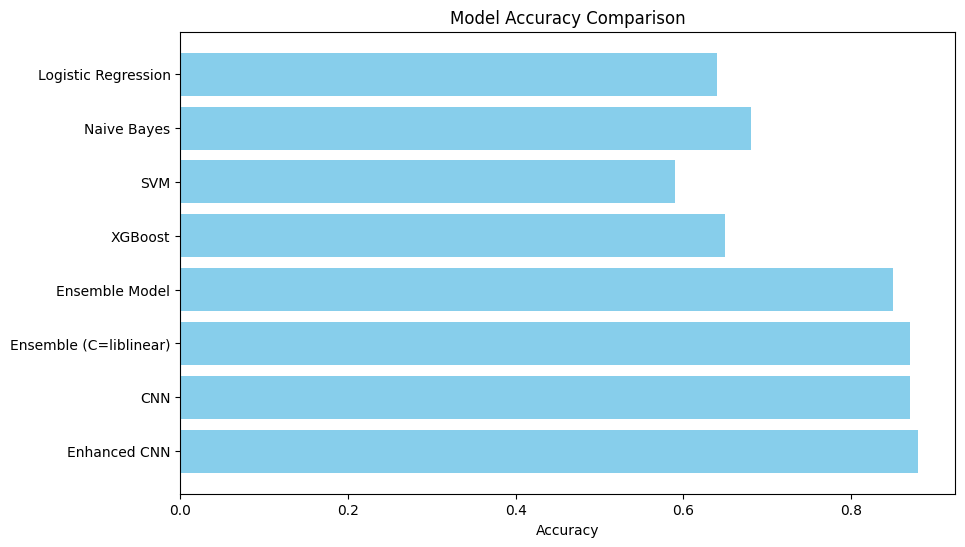

In [30]:
import matplotlib.pyplot as plt

# Define model names and their accuracies
model_names = [
    'Logistic Regression', 'Naive Bayes', 'SVM', 'XGBoost', 
    'Ensemble Model', 'Ensemble (C=liblinear)', 'CNN', 'Enhanced CNN'
]
accuracies = [0.64, 0.68, 0.59, 0.65, 0.85, 0.87, 0.87, 0.88]  

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.gca().invert_yaxis()  # Reverse order for readability
plt.show()
